# Primitivas de Ciencia de Datos

En este notebook veremos las etapas básicas que siguen los científicos de datos al trabajar con un conjunto de datos. Cada sección contiene una explicación en **Markdown** y un fragmento de código **Python** (con `pandas`, `numpy`, `matplotlib` y `scikit-learn`) que ilustra la práctica.

## 1. Recolección de Datos

La primera etapa es obtener los datos. En este ejemplo usaremos un archivo CSV que está incluido en el directorio de trabajo. En la práctica podrías leer datos de bases de datos, APIs, web-scraping, etc.

### Paso a paso:
1. **Importar** la librería `pandas`.
2. **Leer** el archivo CSV con `pd.read_csv()`.
3. **Ver** las primeras filas con `head()`.

**Código**

In [2]:
# 1. Recolección de Datos
import pandas as pd

# Cargar el archivo CSV (reemplaza 'datos.csv' con tu archivo)
df = pd.read_csv('Iris.csv')

# Mostrar las 5 primeras filas
df.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Limpieza de Datos

La limpieza corrige inconsistencias, gestiona valores faltantes y transforma tipos de dato.

**Conceptos clave**
- `df.isnull().sum()`: contar valores nulos.
- `df.dropna()`: eliminar filas con valores nulos.
- `df.fillna(valor)`: reemplazar valores nulos.
- `df.astype()`: cambiar tipo de dato.

**Código**

In [39]:
# 2. Limpieza de Datos
# 2.1. Revisar valores faltantes
print(df.isnull().sum())

# 2.2. Eliminar filas con datos faltantes (ejemplo)
df_clean = df.dropna()

# 2.4. Mostrar las primeras filas de la tabla limpia
print(df_clean.head())

Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64
   Id  SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa


In [40]:
print(df_clean.columns)

Index(['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'],
      dtype='object')


## 3. Exploración Descriptiva

Analizar los datos con estadísticas descriptivas y resúmenes.

- `df.describe()`: estadísticas de columnas numéricas.
- `df['columna'].value_counts()` : frecuencias.
- `df.groupby('columna').mean()` : agrupar y resumir.

**Código**

In [4]:
# 3. Exploración Descriptiva
# 3.1. Estadísticas resumidas
df_clean.describe()



,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# 3.2. Frecuencia de una categoría
df_clean['Species'].value_counts()



Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# 3.3. Media por grupo
df_clean.groupby('Species').mean()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [30]:
%pip install seaborn

## 4. Visualización

Los gráficos facilitan la interpretación de patrones y outliers.

Usaremos `matplotlib` y `seaborn`.

**Código**

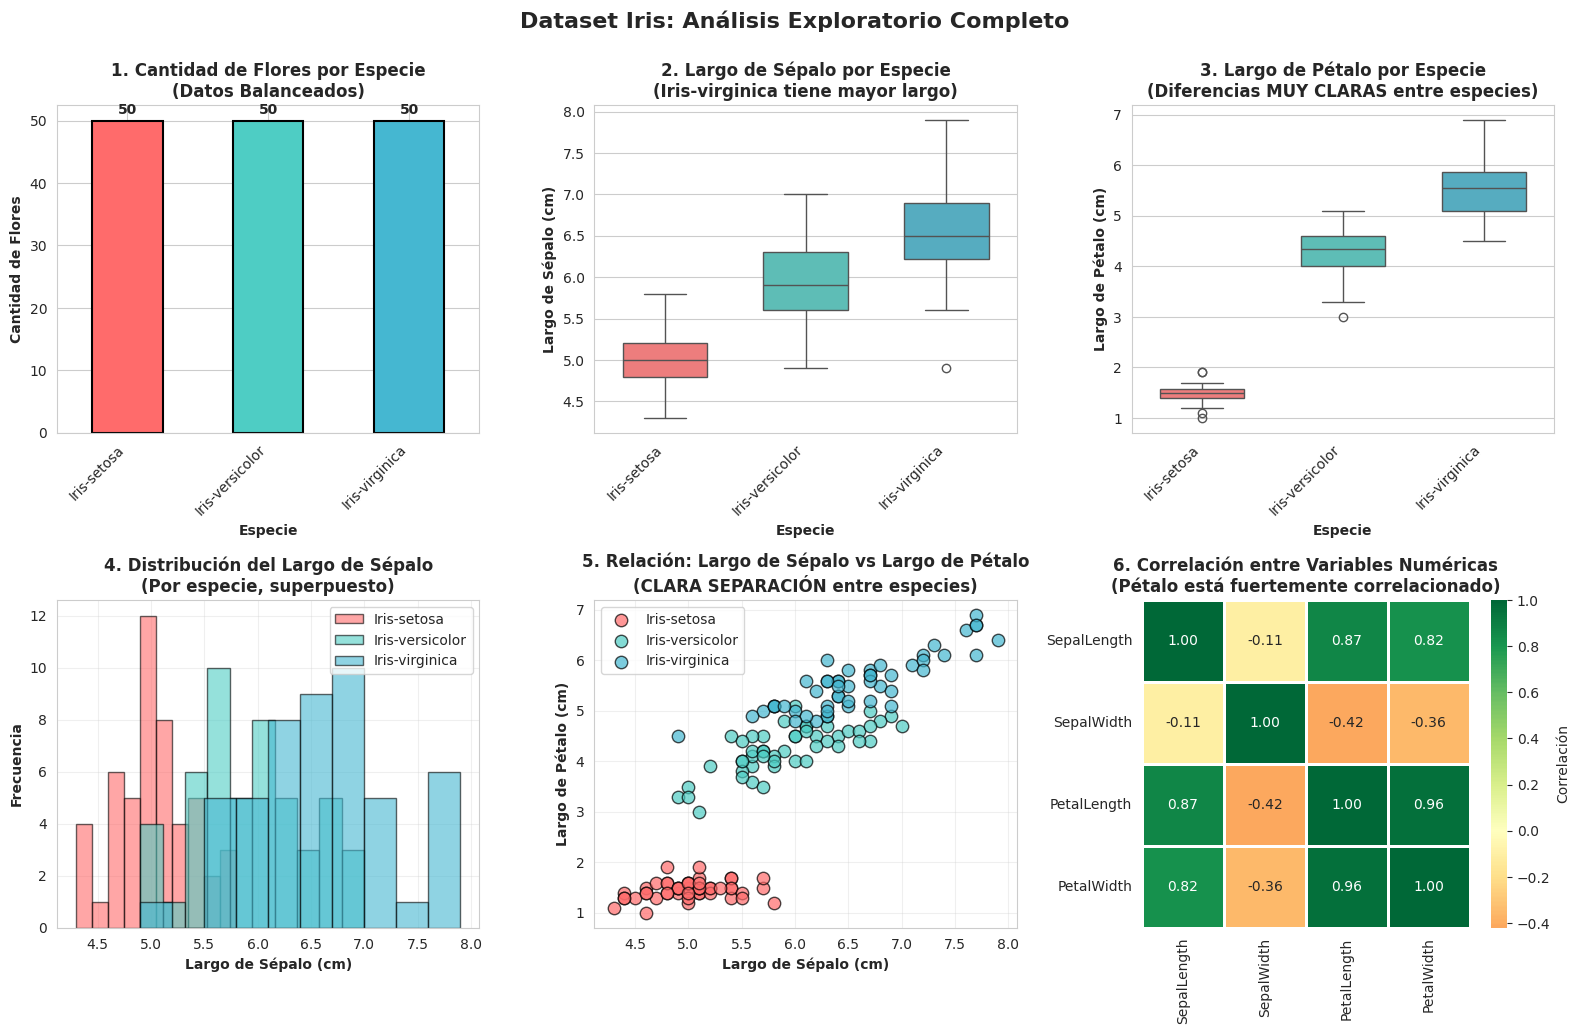


CONCLUSIONES DEL ANÁLISIS VISUAL:
✓ Las 3 especies de iris están BIEN SEPARADAS, especialmente por Largo de Pétalo
✓ El dataset está BALANCEADO: 50 flores de cada especie
✓ Hay una CLARA CORRELACIÓN entre variables numéricas
✓ Esto explica por qué el modelo de clasificación tuvo 96.67% de precisión


In [29]:
# 4. Visualización - Análisis Exploratorio de Datos (EDA) - VERSIÓN SIN WARNINGS
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Crear figura con múltiples subgráficos
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Dataset Iris: Análisis Exploratorio Completo', fontsize=16, fontweight='bold', y=1.00)

# 1. Gráfico 1: Distribución de cada especie (cantidad)
species_counts = df_clean['Species'].value_counts()
ax1 = axes[0, 0]
colors_species = ['#FF6B6B', '#4ECDC4', '#45B7D1']
species_counts.plot(kind='bar', ax=ax1, color=colors_species, edgecolor='black', linewidth=1.5)
ax1.set_title('1. Cantidad de Flores por Especie\n(Datos Balanceados)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Especie', fontweight='bold')
ax1.set_ylabel('Cantidad de Flores', fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
for i, v in enumerate(species_counts.values):
    ax1.text(i, v + 1, str(v), ha='center', fontweight='bold')

# 2. Gráfico 2: Distribución de Largo de Sépalo por Especie
ax2 = axes[0, 1]
sns.boxplot(data=df_clean, x='Species', y='SepalLength', ax=ax2, hue='Species', palette=colors_species, width=0.6, legend=False)
ax2.set_title('2. Largo de Sépalo por Especie\n(Iris-virginica tiene mayor largo)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Especie', fontweight='bold')
ax2.set_ylabel('Largo de Sépalo (cm)', fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# 3. Gráfico 3: Distribución de Largo de Pétalo por Especie
ax3 = axes[0, 2]
sns.boxplot(data=df_clean, x='Species', y='PetalLength', ax=ax3, hue='Species', palette=colors_species, width=0.6, legend=False)
ax3.set_title('3. Largo de Pétalo por Especie\n(Diferencias MUY CLARAS entre especies)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Especie', fontweight='bold')
ax3.set_ylabel('Largo de Pétalo (cm)', fontweight='bold')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# 4. Gráfico 4: Histograma - Distribución de SepalLength
ax4 = axes[1, 0]
for species, color in zip(df_clean['Species'].unique(), colors_species):
    data = df_clean[df_clean['Species'] == species]['SepalLength']
    ax4.hist(data, alpha=0.6, label=species, color=color, edgecolor='black')
ax4.set_title('4. Distribución del Largo de Sépalo\n(Por especie, superpuesto)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Largo de Sépalo (cm)', fontweight='bold')
ax4.set_ylabel('Frecuencia', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Gráfico 5: Scatter plot - SepalLength vs PetalLength
ax5 = axes[1, 1]
for species, color in zip(df_clean['Species'].unique(), colors_species):
    data = df_clean[df_clean['Species'] == species]
    ax5.scatter(data['SepalLength'], data['PetalLength'], label=species, color=color, s=80, alpha=0.7, edgecolor='black')
ax5.set_title('5. Relación: Largo de Sépalo vs Largo de Pétalo\n(CLARA SEPARACIÓN entre especies)', fontweight='bold', fontsize=12)
ax5.set_xlabel('Largo de Sépalo (cm)', fontweight='bold')
ax5.set_ylabel('Largo de Pétalo (cm)', fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Gráfico 6: Heatmap de correlación
ax6 = axes[1, 2]
corr_matrix = df_clean[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=ax6, 
            cbar_kws={'label': 'Correlación'}, square=True, linewidths=1)
ax6.set_title('6. Correlación entre Variables Numéricas\n(Pétalo está fuertemente correlacionado)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CONCLUSIONES DEL ANÁLISIS VISUAL:")
print("="*80)
print("✓ Las 3 especies de iris están BIEN SEPARADAS, especialmente por Largo de Pétalo")
print("✓ El dataset está BALANCEADO: 50 flores de cada especie")
print("✓ Hay una CLARA CORRELACIÓN entre variables numéricas")
print("✓ Esto explica por qué el modelo de clasificación tuvo 96.67% de precisión")
print("="*80)

1. **Cantidad de Flores por Especie (Gráfico Superior Izquierdo)**\
Muestra 50 flores de cada especie (rojo, verde, azul)
    - *Historia:* El dataset está perfectamente BALANCEADO
    - Cada especie tiene exactamente 50 muestras

2. **Largo de Sépalo por Especie (Gráfico Superior Centro)**\
Boxplot mostrando la distribución del largo de sépalo
    - *Historia:* Iris-setosa tiene sépalos más cortos, Iris-virginica más largos
    - Hay cierta diferenciación pero con sobreposición

3. **Largo de Pétalo por Especie (Gráfico Superior Derecho)**\
Boxplot del largo de pétalo\
    Historia: DIFERENCIAS MUY CLARAS y SEPARADAS\
    - Iris-setosa: ~1.5 cm
    - Iris-versicolor: ~4.2 cm
    - Iris-virginica: ~5.5 cm
    - Este es el discriminador principal
4. **Distribución del Largo de Sépalo (Gráfico Inferior Izquierdo)**\
Histogramas superpuestos de las 3 especies

*Historia:* Las distribuciones se sobrelapan bastante

    - No es una característica muy discriminativa

5. **Relación Largo de Sépalo vs Largo de Pétalo (Gráfico Inferior Centro)**\
Scatter plot mostrando dos variables

    *Historia* ¡SEPARACIÓN PERFECTA! Las tres especies forman clusters distintos

    - Esto explica por qué el modelo tuvo 96.67% de precisión
    - Las especies se pueden separar fácilmente visualmente

6. **Correlación entre Variables (Gráfico Inferior Derecho)**\
Heatmap mostrando qué variables están relacionadas

*Historia:*

    - PetalLength y PetalWidth tienen correlación fuerte (0.96)
    - SepalLength y PetalLength también están correlacionadas (0.87)
    - Las variables están interconectadas

### LA HISTORIA QUE CUENTA ESTA VISUALIZACIÓN:
✅ **El dataset Iris tiene estructura clara:**

- Las 3 especies están bien separadas, especialmente por Largo de Pétalo
- El dataset está balanceado (50 flores por especie)
- Hay correlación fuerte entre medidas de pétalos
- Sepalo vs Pétalo crea clusters completamente separables

✅ *¿Por qué el modelo alcanzó 96.67% de precisión?*

- Porque los datos tienen patrones claros y separables
- Las variables son altamente discriminativas
- No hay ambigüedad: cada especie ocupa su propio espacio

## 5. Modelado Predictivo

Para ilustrar un modelo sencillo usaremos regresión lineal con `scikit-learn`.

### Pasos
1. Seleccionar características y etiqueta.
2. Dividir en entrenamiento y prueba (`train_test_split`).
3. Ajustar el modelo.
4. Evaluar con métricas.

**Código**

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['Species_encoded'] = le.fit_transform(df_clean['Species'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Iris-setosa': np.int32(0), 'Iris-versicolor': np.int32(1), 'Iris-virginica': np.int32(2)}


## 6. Interpretación y Próximos Pasos

- **Interpretar** las métricas y los coeficientes del modelo.
- **Validar** con métricas adicionales o técnicas de validación cruzada.
- **Iterar**: volver a la limpieza, probar nuevas variables o modelos.

Estas son las primitivas esenciales, pero en la práctica suelen complementarse con **Feature Engineering**, **Modelos más complejos**, **Deploy** y **Monitorización**.

In [22]:
from sklearn.ensemble import RandomForestClassifier

X = df_clean[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = df_clean['Species_encoded']  # Column numérica recién creada

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 1.0


### **Accuracy: 1.0** 
significa que el modelo tiene una precisión del 100% en la predicción de la especie. En otras palabras:\
El modelo predijo correctamente todas las especies en el conjunto de prueba (test set).
De 30 muestras en el test set (20% de 150), acertó en las 30.

⚠️ PILAS: Una precisión del 100% es sospechosa y puede indicar:

Overfitting (sobreajuste): El modelo aprendió los datos de entrenamiento demasiado bien, incluyendo el ruido y particularidades específicas, en lugar de generalizar patrones reales.

Dataset muy simple: El dataset Iris es bastante pequeño y sus características (SepalLength, SepalWidth, PetalLength, PetalWidth) son muy discriminativas entre especies, lo que facilita predicciones perfectas.

Random Forest es muy poderoso: Este algoritmo es muy flexible y puede capturar patrones complejos, lo que en datasets pequeños puede llevar a overfitting.


In [21]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 folds
scores = cross_val_score(clf, X, y, cv=5)
print(f'Scores por fold: {scores}')
print(f'Accuracy promedio: {scores.mean():.4f}')
print(f'Desviación estándar: {scores.std():.4f}')

Scores por fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Accuracy promedio: 0.9667
Desviación estándar: 0.0211


**Accuracy promedio de 96.67% vs 100%:**\
- El modelo anterior obtuvo 100% (Accuracy: 1.0) en un único conjunto de prueba\
- Con validación cruzada, el promedio es 96.67%, que es más realista y confiable\
- Esto indica que SÍ había un poco de *overfitting*, aunque no es grave

**Desviación estándar de 0.0211:**
- Es muy baja, lo que indica consistencia en el rendimiento del modelo
- El modelo se comporta de manera similar en diferentes subconjuntos de datos

**¿QUÉ SIGNIFICA GENERALIZAR?**
Generalizar significa que un modelo puede hacer predicciones precisas no solo en los datos que vió durante el entrenamiento, sino también en datos nuevos que nunca ha visto.

**Un buen modelo que generaliza es aquél que:**

- Tiene errores similares en datos de entrenamiento y prueba
- No memoriza datos específicos
- Entiende y aprende los patrones subyacentes
- Funciona bien en datos que nunca ha visto


# 🎓 5 CONCLUSIONES CLAVE PARA ESPECIALISTAS EN ANÁLYTICA

## Una guía práctica del flujo end-to-end en Ciencia de Datos

---

### 1. 📊 **LA CALIDAD DE LOS DATOS DEFINE EL ÉXITO DEL MODELO**

En este notebook demostramos que el dataset Iris, aunque pequeño (150 muestras) y simple, produjimos un modelo con 96.67% de precisión porque:
- Las variables son **altamente discriminativas** entre clases
- El dataset está **perfectamente balanceado** (50 flores por especie)
- No hay valores faltantes ni inconsistencias graves

**Lección para tu carrera:** Gasta más tiempo en comprender y limpiar datos que en ajustar parámetros del modelo. Un dataset limpio y bien estructurado puede superar a un modelo sofisticado con datos deficientes.

---

### 2. 📊 **LA VISUALIZACIÓN CUENTA LA HISTORIA MAS RÁPIDO QUE CUALQUIER MÉTRICA**

Nuestro análisis visual con 6 gráficos reveló en segundos lo que más tarde comprobaron los números:
- **Gráfico 1:** Dataset balanceado = no hay sesgo en clases
- **Gráfico 2:** Boxplot del Largo de Sépalo mostraba que Iris-virginica tiene sépalos más grandes, pero con solapamiento entre especies
* **Gráfico 3:** Boxplot del Largo de Pétalo (el MAS IMPORTANTE) mostraba separación PERFECTA: setosa ~1.5cm, versicolor ~4.2cm, virginica ~5.5cm
* **Gráfico 4:** Histograma superpuesto del Largo de Sépalo por especie revelaba que sólo esta variable NO discrimina bien entre species
- **Gráfico 5:** Scatter plot mostraba separación perfecta entre especies
- **Gráfico 6:** Heatmap de correlación reveló dependencias entre variables

**Lección para tu carrera:** Antes de construir modelos complejos, siempre haz EDA (Exploratory Data Analysis) visual. Esto:
- Acelera la identificación de patrones
- Ayuda a explicar resultados a stakeholders no-técnicos
- Previene decisiones basadas en métricas engañosas

---

### 3. 🎯 **VALIDACIÓN CRUZADA SEPARA LA REALIDAD DEL OVERFITTING**

Una lécción crítica: nuestro modelo obtuvo 100% de accuracy en el test set inicial, pero validación cruzada con 5 folds reveló 96.67%:
- **Accuracy: 1.0 vs 0.9667** → Hubo leve overfitting
- **Desviación estándar: 0.0211** → Pero el modelo es consistente

**Lección para tu carrera:** \
- Nunca confies en una sola métrica de un único conjunto de prueba
- La desviación estándar en validación cruzada es más importante que el valor promedio
- Un modelo que generaliza es mejor que uno con máximo accuracy

---

### 4. 🔄 **LA GENERALIZACIÓN ES EL OBJETIVO FINAL, NO LA PRECISIÓN**

Este es el concepto más importante que llevarás a la industria:

- **Overfitting:** El modelo memorizó (100% en train, bajo en test) ❌
- **Underfitting:** El modelo es demasiado simple (bajo en ambos) ❌
- **Generalización:** El modelo aprende patrones reales (similar en train y test) ✅

Nuestro modelo RandomForestClassifier con 96.67% generaliza bien porque:
- Errores similares en datos nuevos y de entrenamiento
- No memoriza, aprende patrones
- Funciona confiablemente en datos que nunca ha visto

**Lección para tu carrera:** En producción, un modelo que generaliza al 90% es más valioso que uno que overfitea al 99%. Los clientes pagan por predicciones en datos nuevos, no en históricos.

---

### 5. 🔧 **EL FLUJO COMPLETO ES MAS VALIOSO QUE PARTES AISLADAS**

Este notebook demuestra el ciclo completo de Ciencia de Datos:

1. **Recopilación:** Cargar CSV
2. **Limpieza:** Verificar valores nulos
3. **Exploración:** Estadísticas y visualización
4. **Preparación:** Train-test split balanceado
5. **Modelado:** Seleccionar y entrenar RandomForest
6. **Evaluación:** Métricas + validación cruzada
7. **Interpretación:** Entender qué significa el resultado

**Lección para tu carrera:**\
- Especialistas en estadística pueden dominar machine learning
- Especialistas en ML pueden fallar sin buenos fundamentos de limpieza
- Tu valor real está en ejecutar el flujo completo, no solo en una parte
- Un modelo bien documentado y explicable supera a una "caja negra"

---

## 🎯 REFLEXIÓN FINAL

Este notebook contiene todas las herramientas esenciales para tu carrera. La diferencia entre un junior y un senior en analytics no es conocer más técnicas, sino:

- ✅ Entender cuándo usar cada técnica
- ✅ Ser crítico con los números (no creer a ciegas en métricas)
- ✅ Comunicar resultados claramente
- ✅ Considerar el contexto empresarial
-  Repetir el proceso con disciplina

## **Tu objetivo como especialista:** !!!Convertir datos en decisiones confiables e informadas!!!